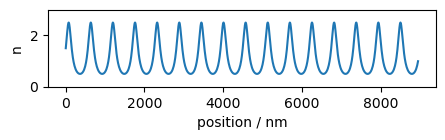

In [7]:
import sys
sys.path.append('./../../')
sys.path.append('./..')
sys.path.append('./../../designer/script/')


from film import FreeFormFilm, BaseFilm, TwoMaterialFilm, EqOTFilm
from design import BaseDesign
from spectrum import BaseSpectrum, Spectrum
from optimizer.adam import AdamFreeFormOptimizer

from analyze_utils.make_design import make_edgefilter_design, make_triband_filter_design, make_reflection_design, get_minus_filter_spec

from utils.loss import calculate_RMS_f_spec
from analyze_utils.result_io import save, load
from analyze_utils.structure import plot_layer_thickness

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import copy
import pickle


n_size = 1000
each_ot = 10 # nm
init_n = np.sin(5 * np.linspace(0, 20, n_size)) + 1.5

film = EqOTFilm(init_n, each_ot * n_size, substrate=1.5)

fig, ax = plt.subplots(1, 1)
ax.plot(np.cumsum(film.get_d()), film.get_n())
ax.set_ylim(0, 3)
ax.set_xlabel('position / nm')
ax.set_ylabel('n')

fig.set_size_inches(5, 1)
fig.savefig('./demo.png',dpi=300, bbox_inches='tight')